In [124]:
# implement the K-mean from Scratch

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
from sklearn.datasets.samples_generator import make_blobs


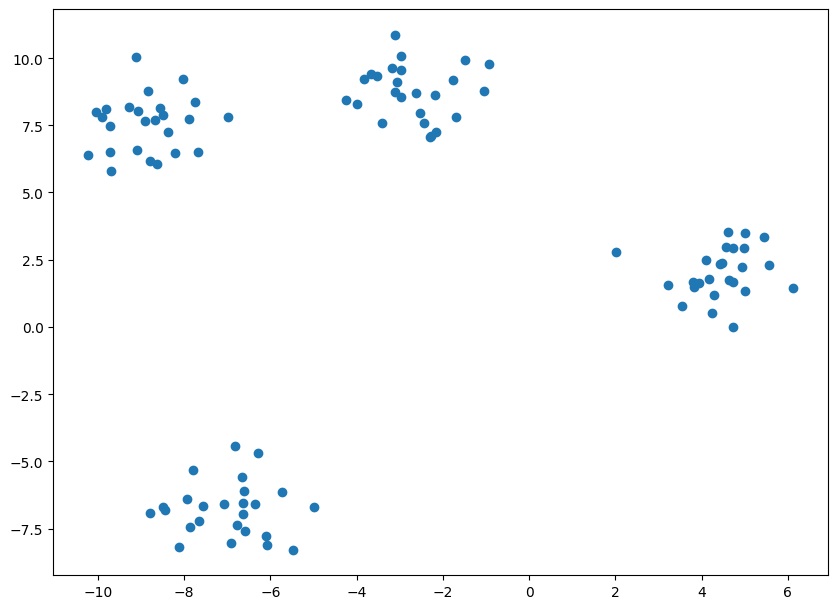

In [126]:
# generate sample data
X, y = make_blobs(n_samples=100, centers=4, random_state=42)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1]);

In [127]:
X[0:5, :]

array([[-9.68512147,  5.80867569],
       [-6.06610997, -8.11097391],
       [-2.97867201,  9.55684617],
       [-5.47683288, -8.28196066],
       [-8.4805404 ,  7.88430744]])

In [128]:
y

array([3, 2, 0, 2, 3, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 3, 3, 1, 3, 3, 0, 3,
       3, 1, 1, 0, 1, 3, 3, 2, 2, 1, 2, 3, 0, 0, 0, 0, 1, 1, 3, 1, 2, 0,
       0, 2, 2, 3, 3, 1, 1, 1, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 3, 2, 3, 3,
       2, 3, 1, 2, 1, 2, 3, 0, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 3, 1])

In [129]:
class kMean(object):

  def __init__(self, k):
    self.k = k  # k clusters
  

  def get_distance(self, xa, xb):
      return (np.sum((xa - xb)**2))**0.5

  # Assign input X to clusters based on the centroid
  def assign_clusters(self, centroids, X_arr):
    clusters = []
    for x in X_arr:
      dist_list = []
      for cent in centroids:
        tmp_dist = self.get_distance(x, cent)
        dist_list.append(tmp_dist)
      # default centroid index from 0 to k
      for j, v in enumerate(dist_list):
        if v == min(dist_list):
            clusters.append(j)
            break
    return clusters

  def get_centroids(self, clusters, X_arr):
    new_centroids = []
    variance_each_cluster = []  # for testing and visualization purpose
    N = X.shape[0]
    cluster_each_element = defaultdict(list)
    for i in range(N):
        cluster_each_element[clusters[i]].append(X_arr[i])
    for c, vals in cluster_each_element.items():
        cluster_mean = np.mean(vals, axis= 0)
        new_centroids.append(cluster_mean)

        cluster_var = np.var(vals - cluster_mean, axis = 0)
        variance_each_cluster.append(cluster_var)
    return new_centroids, variance_each_cluster


  def run_k_mean(self, X_arr):
    N = X.shape[0]
    rand_indx = np.random.randint(0, N, self.k)
    print("rand_indx: ", rand_indx)
    centroids = [X_arr[i] for i in rand_indx]   # initialize random centroid
    ITER_NUM = 20
    for i in range(ITER_NUM):
      clusters = self.assign_clusters(centroids, X_arr)
      centroid, variance_each_cluster = self.get_centroids(clusters, X_arr)
      
      #print("cluster variance of each round: ", i, np.mean(variance_each_cluster))
      
    return clusters


In [130]:
k = 4
kMeanObj = kMean(k)
clusters = kMeanObj.run_k_mean(X)
clusters

rand_indx:  [85 82 21 19]


[3,
 3,
 1,
 0,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 0,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 3,
 1,
 1,
 3,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 3,
 2,
 2,
 1,
 0,
 1,
 0,
 3,
 0,
 3,
 3,
 2,
 3,
 3,
 2,
 1,
 3,
 0,
 3,
 2,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 1,
 3,
 1,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 3,
 0]

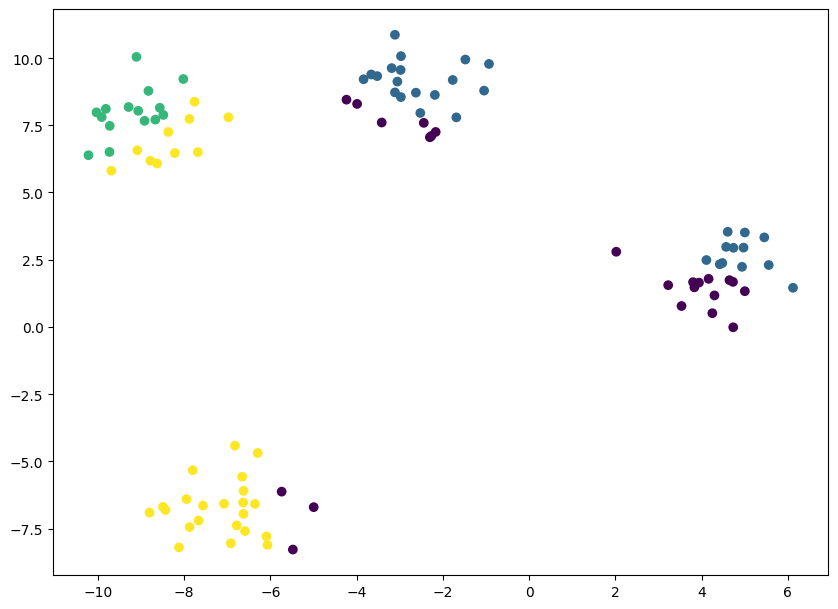

In [131]:
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1], c=clusters);